# <center> Econ 373: Computational Economics (with Python) </center>
## <center> Homework 7 (Individual) </center>

# <font color='red'>Name:</font>

# <font color='red'>Instructions:</font>
- Save all of your code to a .ipynb file (jupyter notebook file) and name it as **username_hw7.ipynb**. 
    - **You should remove any test cells/code that is outside of functions.**
    - Submit only username_hw7.ipynb file
- For each question, your file should contain a function labeled **q#** with input/output requirements specified below. 
    - The input refers to the arguments passed to the function. 
    - The output refers to what is returned by the function.
    - We may require output to file or screen within a function, but if that is the case it will be clearly specified.
    - Your functions may call other functions or classes that you create, but they have to be included in the file (i.e., the file that you submit should be self-contained).
    - If your function calls on functions from other libraries, you need to load them within the function (e.g., if you use the os library you should assume that it has been installed on the computer but it has not been imported before calling your function).
    

## Grading

- We will run your file by clicking Kernel--> Restart and Run All. You file should be able to reproduce all the results stored in your jupyter file. 

- We may also run your code by specifying q#(arg) in an empty cell. It should reproduce your stored results. 

Each question is graded on a 3-point scale + 1 point for following the instructions 
- 0 -- no or minimal work submitted (e.g., minor modification of the 'starting point')
- 1 -- some work done but there are errors running/executing the code or results are mostly incomplete
- 2 -- code runs, but results are either somewhat incomplete, incorrect, or there is clear room for improvement (e.g., no comments in the code, graphs are not labelled, etc.) 
- 3 -- all results complete and correct with clear commented code 

In [8]:
import time
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline 
import random

In [9]:
import os
# To find your working directory:
%pwd 
# Code in case you want to change your working directory:  %cd
# for example: %cd "C:\Users\\Purdue\ComputationalEconomicsECON320\Week3_4\Group\"
# Define your data folder here:
datafolder = "C:\\Users\\xinxi\\Dropbox\\Fall 2021\\03-hw\\hw07\\HW7_Data\\"
# Please use an absolute path
outputfolder= "C:\\Users\\xinxi\\Dropbox\\Fall 2021\\03-hw\\hw07\\HW7_Output\\"

## Question 1: Estimating Expected Stock Value using Monte Carlo Simulation

Imagine you own a single share of a company, denoted as 'XYZ'. The current price of this share is \$1.00. Every day, there's a possibility of fluctuation in this price due to various circumstances:
- There is a 0.005 probability that the stock price will **increase** by \$0.10.
- There is a 0.005 probability that the stock price will **decrease** by \$0.05.
- There is a 0.0001 probability that the company could go **bankrupt**, meaning the stock price drops to $0.00.

Write a function that estimates **the expected value of your share in XYZ company a year from now.**

#### Assumptions:
- A year comprises 365 days.
- If the stock price hits $0.00 at any moment, the company is considered bankrupt

#### Other Function Details:
- **Input**: none
- **Output**: the expected value

In [10]:
import random
import pandas as pd
import numpy as np

In [11]:
import random

def q1():
    simulations = 10000  
    total_value = 0  

    for _ in range(simulations):
        stock_price = 1.00  # initial stock price
        for _ in range(365):  # simulate for 365 days
            rand = random.random()
            if rand < 0.005:
                stock_price += 0.10
            elif rand < 0.010:
                stock_price -= 0.05
            elif rand < 0.0101:
                stock_price = 0.00
                break  
        total_value += stock_price

    expected_value = total_value / simulations
    return expected_value

print(q1())

1.049654999999999


## Question 2: Visualizing the Birthday Problem for Different Matches

The Birthday Paradox traditionally investigates the likelihood of at least two individuals sharing the same birthday within a group. Extending this, this question aims to explore and visualize the probability thresholds for scenarios where at least 2, 3, or 4 individuals share a birthday. To this end, you need to write a function that builds on the existing code to produce a graph that represents the necessary group size to have a 50-50 chance for scenarios where:
- At least 2 people share a birthday
- At least 3 people share a birthday
- At least 4 people share a birthday


#### Other Function Details:

- **Input**: None.
- **Output**: A graph saved as a PDF figure - "username_hw7_q2.pdf" in the output folder, with clear axis labels and legends.

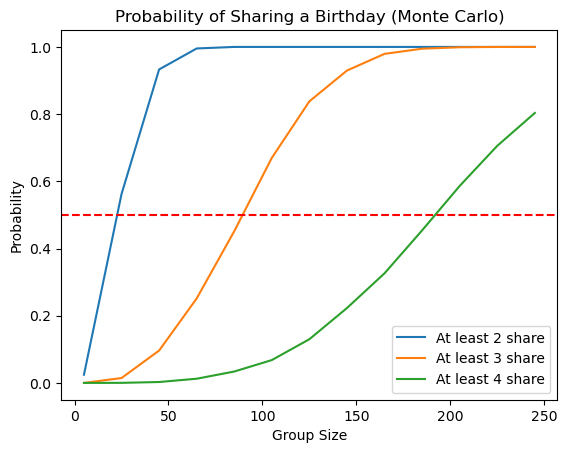

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_birthday(num_people, trials=10000):
    shared_2, shared_3, shared_4 = 0, 0, 0
    for _ in range(trials):
        birthdays = np.random.choice(365, num_people)
        unique, counts = np.unique(birthdays, return_counts=True)
        if 2 in counts:
            shared_2 += 1
        if 3 in counts:
            shared_3 += 1
        if 4 in counts:
            shared_4 += 1
    return shared_2/trials, shared_3/trials, shared_4/trials

def q2():
    groupSizes = np.arange(5,250,20)
    prob_2, prob_3, prob_4 = [], [], []
    
    for n in groupSizes:
        p2, p3, p4 = simulate_birthday(n)
        prob_2.append(p2)
        prob_3.append(p3)
        prob_4.append(p4)

    plt.plot(groupSizes, prob_2, label="At least 2 share")
    plt.plot(groupSizes, prob_3, label="At least 3 share")
    plt.plot(groupSizes, prob_4, label="At least 4 share")
    plt.axhline(y=0.5, color='r', linestyle='--')
    plt.xlabel("Group Size")
    plt.ylabel("Probability")
    plt.title("Probability of Sharing a Birthday (Monte Carlo)")
    plt.legend()
    plt.savefig("username_hw7_q2.pdf")
    plt.show()

# Call the function to visualize the results
q2()


## Question 3: Price Trend Simulation

In this problem, you need to use the historical data of the SPDR S&P 500 ETF Trust (SPY) to simulate its future price trend, considering the daily price changes over the last six months as being representative of the general trend. To achieve this you will need to rely on random sampling with replacement to generate 10,000 possible future price paths over the next 100 days. The final visualization will represent the average price path with a 95% confidence interval.


#### General Steps:

1. **Data**:
    - Import the daily adjusted close prices from "SPY_6month.csv" (located in your data folder).

2. **Calculate Daily Price Changes**:
    - Compute the daily percentage change in price between each consecutive trading day.

3. **Simulate Future Price Paths**:
    - Randomly sample (with replacement) from the calculated daily price changes to simulate possible future paths of SPY prices for the next 100 trading days.
    - Repeat this simulation 10,000 times.

4. **Calculate Statistics of Interest**:
    - Compute the average daily price for each of the 100 days.
    - Determine the 95% confidence interval for each of the 100 days. 

5. **Visualize**:
    - Plot the average price path and the 95% confidence interval of the SPY prices over the simulated period.


#### Other Function Details:

- **Input**: None.
- **Output**: A PDF "username_hw7_q3.pdf" saved to the output folder.



*Make sure that "SPY_6month.csv" is in your data folder.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

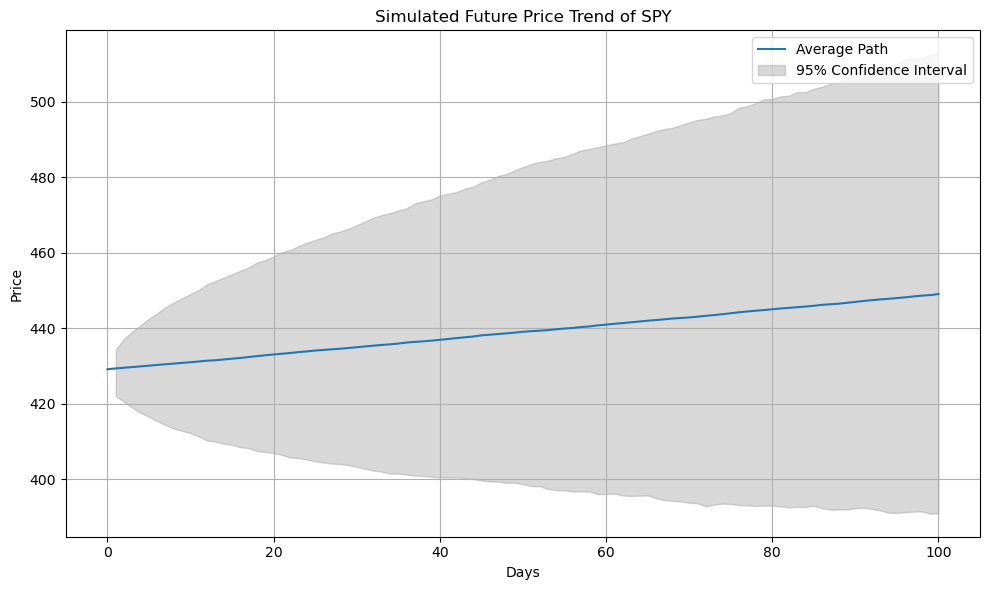

In [13]:
Data = pd.read_csv("SPY_6month.csv")

Data['price_t-1'] = Data['Close'].shift(1)
Data['PriceChange'] = (Data['Close'] - Data['price_t-1']) / Data['price_t-1']

Data = Data.dropna()

simulations = []
last_price = Data['Close'].iloc[-1]
days = 100
simulations_count = 10000

for _ in range(simulations_count):
    daily_returns = np.random.choice(Data['PriceChange'], days, replace=True)
    price_path = [last_price]
    for ret in daily_returns:
        price_path.append(price_path[-1] * (1 + ret))
    simulations.append(price_path)

simulations = np.array(simulations)
mean_path = simulations.mean(axis=0)
upper_bound = np.percentile(simulations[:, 1:], 97.5, axis=0)
lower_bound = np.percentile(simulations[:, 1:], 2.5, axis=0)


plt.figure(figsize=(10, 6))
plt.plot(mean_path, label='Average Path')
plt.fill_between(range(1, days + 1), lower_bound, upper_bound, color='gray', alpha=0.3, label='95% Confidence Interval')
plt.title("Simulated Future Price Trend of SPY")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig("username_hw7_q3.pdf")
plt.show()
